# Capstone Project - Data Analysis and Visualization with Python

## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ass=pd.read_csv('all_sites_scores.csv')

In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 0A0A-BFBC

 Directory of C:\Users\Haris\Pandas Python\Python Udemy Course\06-Capstone-Project

05/12/2024  11:02 PM    <DIR>          .
04/25/2024  10:45 PM    <DIR>          ..
05/12/2024  05:56 PM    <DIR>          .ipynb_checkpoints
04/28/2024  05:47 PM         1,077,955 00-Capstone-Project.ipynb
05/12/2024  11:01 PM         1,082,835 01-Capstone-Project-Solutions .ipynb
04/22/2024  09:12 PM             7,431 all_sites_scores.csv
05/12/2024  11:02 PM           741,788 Capstone_project_working.ipynb
04/22/2024  09:12 PM            18,868 fandango_scrape.csv
05/12/2024  05:54 PM           314,447 Untitled.ipynb
               6 File(s)      3,243,324 bytes
               3 Dir(s)  263,124,742,144 bytes free


**Explore the DataFrame Properties and Head.**

In [5]:
fd=pd.read_csv('fandango_scrape.csv')

In [6]:
fd

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [7]:
fd.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Explore the relationship between popularity of a film and its rating. Create a scatterplot showing the relationship between rating and votes. Feel free to edit visual styling to your preference.**

<Axes: xlabel='RATING', ylabel='VOTES'>

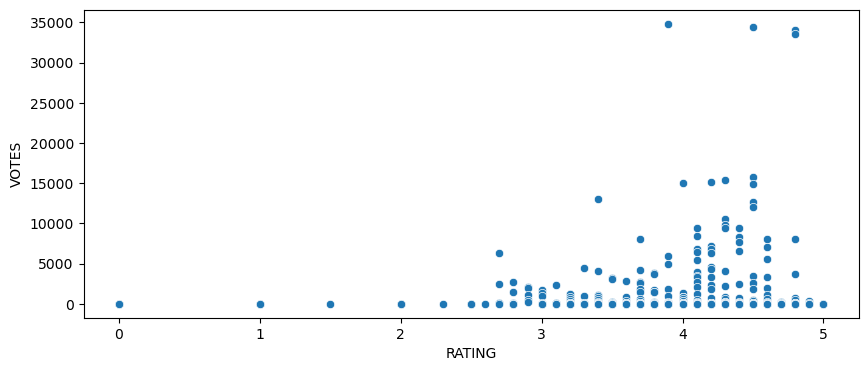

In [8]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=fd,x='RATING',y='VOTES')

**Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [10]:
def Year(num):
    return str(num)[-5:-1]
fd['YEAR']=fd['FILM'].apply(Year)

In [11]:
fd['YEAR']=fd['YEAR'].astype(int)

**How many movies are in the Fandango DataFrame per year? Visualize them.**

<Axes: xlabel='YEAR', ylabel='count'>

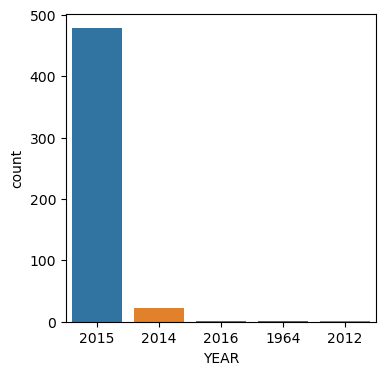

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(data=fd,x='YEAR',order=fd['YEAR'].value_counts().index)

**What are the 10 movies with the highest number of votes?**

In [13]:
fd.sort_values('VOTES',ascending=False).head(10)
#also 
#fd.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**How many movies have zero votes?**

In [208]:
len(fd[fd['VOTES']==0])

69

**Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [209]:
fdv=fd[fd['VOTES']!=0]

In [210]:
fdv

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


**Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

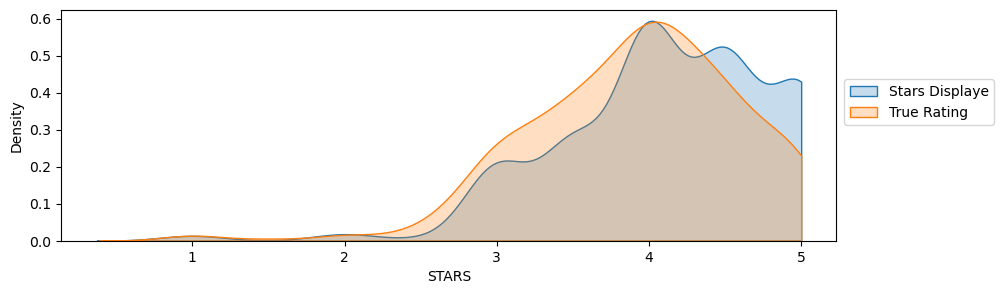

In [211]:
plt.figure(figsize=(10,3))
sns.kdeplot(data=fdv,x='STARS',fill=True,clip=[0,5],label='Stars Displaye')
sns.kdeplot(data=fdv,x='RATING',fill=True,clip=[0,5],label='True Rating')
plt.legend(loc=(1.01,0.5))


**Create a new column of the different between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.**

In [212]:
fdv_copy = fdv.copy()
fdv_copy['STARS_DIFF'] =np.round(fdv_copy['STARS'] - fdv_copy['RATING'],2)


In [213]:
fdv_copy

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Create a count plot to display the number of times a certain difference occurs:**

<Axes: xlabel='STARS_DIFF', ylabel='count'>

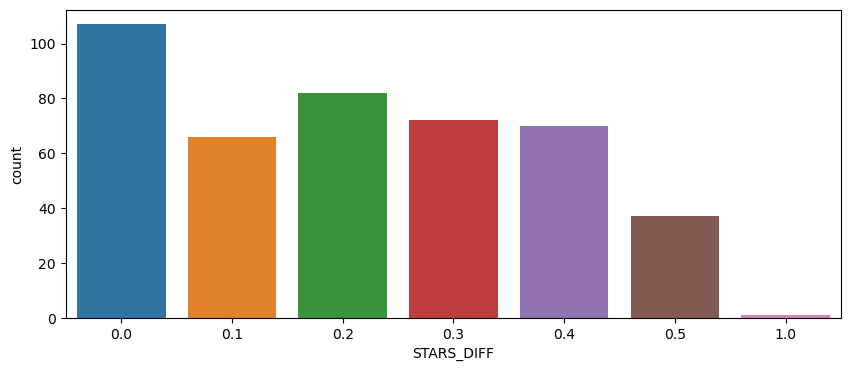

In [214]:
plt.figure(figsize=(10,4))
sns.countplot(data=fdv_copy,x='STARS_DIFF',width=0.8)

 **We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [215]:
fdv_copy[fdv_copy['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [216]:
ass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


## Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

**Read in the "all_sites_scores.csv" file by running the cell below**

In [217]:
ass.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

(0.0, 100.0)

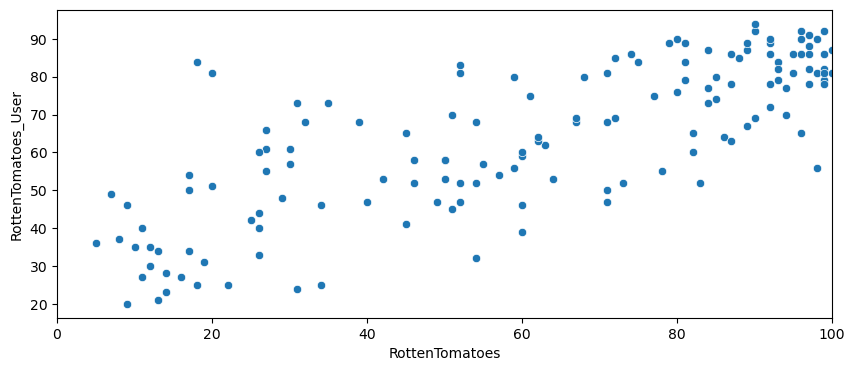

In [218]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=ass,y='RottenTomatoes_User',x='RottenTomatoes')
plt.xlim(0,100)

**Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [219]:
ass['Rotten_Diff']  = ass['RottenTomatoes'] - ass['RottenTomatoes_User']

**Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [220]:
ass['Rotten_Diff'].apply(abs).mean()

15.095890410958905

**Plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot.**

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

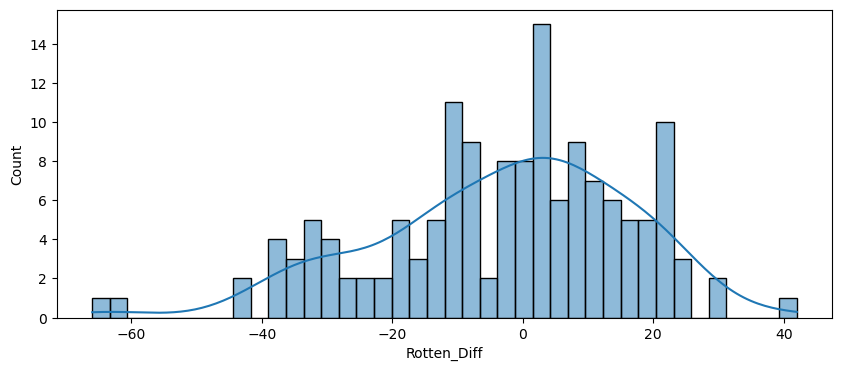

In [221]:
plt.figure(figsize=(10,4))
sns.histplot(data=ass,x='Rotten_Diff',kde=True,bins=40)


**Now create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

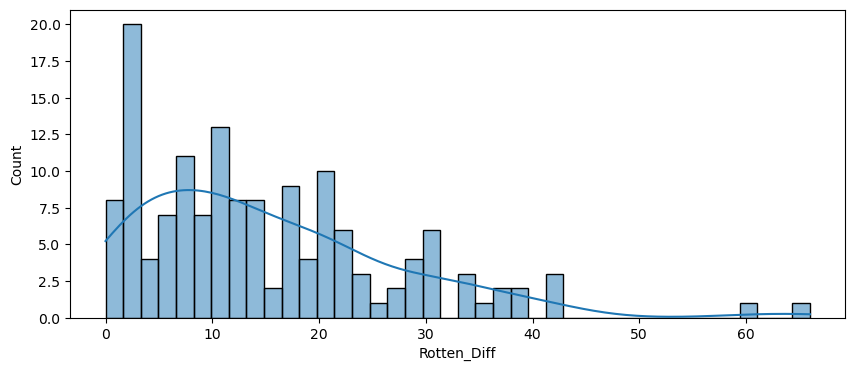

In [222]:
plt.figure(figsize=(10,4))
sns.histplot(data=ass,x=ass['Rotten_Diff'].apply(abs),kde=True,bins=40)

**What are the top 5 movies users rated higher than critics on average:**

In [223]:
ass[['FILM','Rotten_Diff']].sort_values('Rotten_Diff',ascending=False).head()

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


**Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

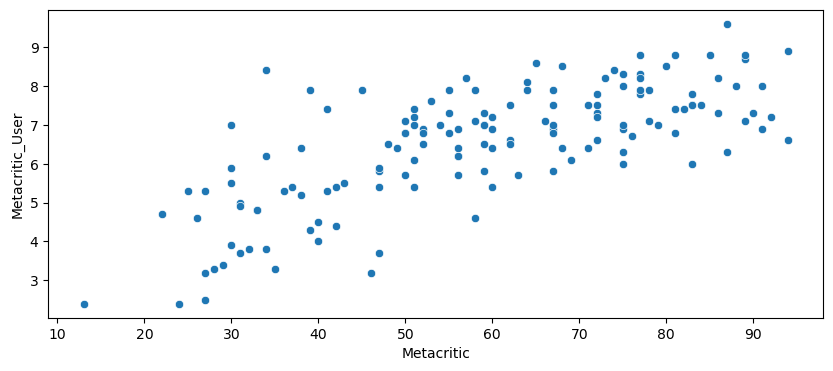

In [225]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=ass,x='Metacritic',y='Metacritic_User')

## IMBD

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

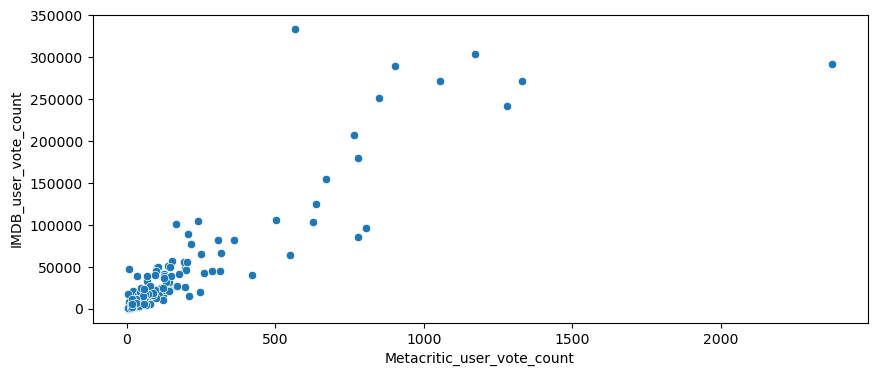

In [226]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=ass,y='IMDB_user_vote_count',x='Metacritic_user_vote_count')

**What movie has the highest IMDB user vote count?**

In [227]:
ass.sort_values('IMDB_user_vote_count',ascending=False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**What movie has the highest Metacritic User Vote count?**

In [228]:
ass.sort_values('Metacritic_user_vote_count',ascending=False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews.**

In [230]:
df=pd.merge(fd,ass,on='FILM',how='inner')

In [231]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.**

In [232]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [234]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [235]:
dfnorm=df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [236]:
dfnorm

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


### Comparing Distribution of Scores Across Sites

**Create a plot comparing the distributions of normalized ratings across all sites.**


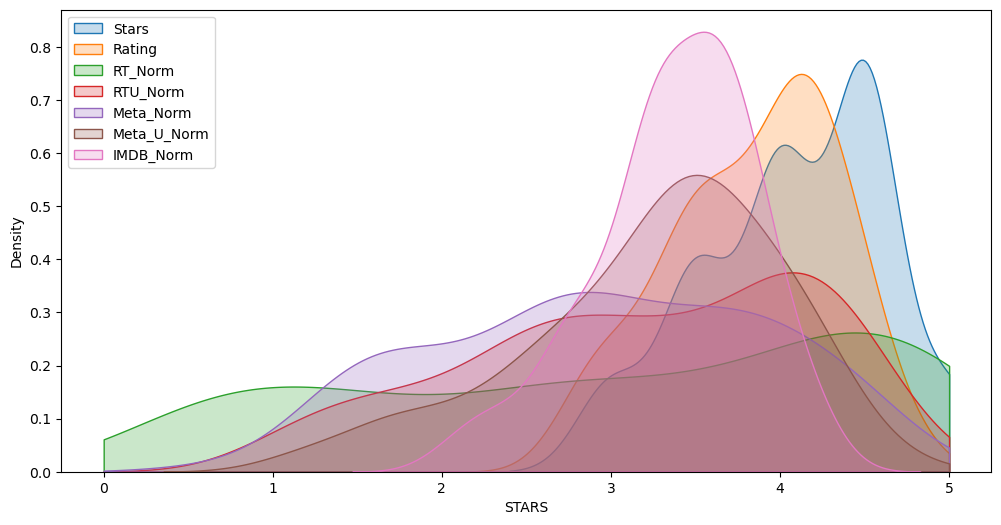

In [242]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df,x='STARS',fill=True,clip=[0,5],label='Stars')
sns.kdeplot(data=df,x='RATING',fill=True,clip=[0,5],label='Rating')
sns.kdeplot(data=df,x='RT_Norm',fill=True,clip=[0,5],label='RT_Norm')
sns.kdeplot(data=df,x='RTU_Norm',fill=True,clip=[0,5],label='RTU_Norm')
sns.kdeplot(data=df,x='Meta_Norm',fill=True,clip=[0,5],label='Meta_Norm')
sns.kdeplot(data=df,x='Meta_U_Norm',fill=True,clip=[0,5],label='Meta_U_Norm')
sns.kdeplot(data=df,x='IMDB_Norm',fill=True,clip=[0,5],label='IMDB_Norm')

plt.legend(loc=(2))

**Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

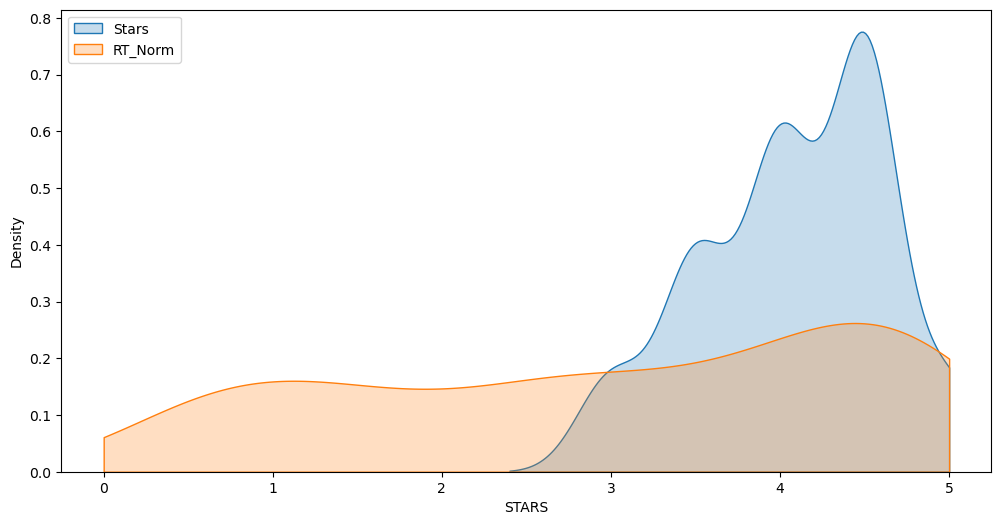

In [243]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df,x='STARS',fill=True,clip=[0,5],label='Stars')
#sns.kdeplot(data=df,x='RATING',fill=True,clip=[0,5],label='Rating')
sns.kdeplot(data=df,x='RT_Norm',fill=True,clip=[0,5],label='RT_Norm')
#sns.kdeplot(data=df,x='RTU_Norm',fill=True,clip=[0,5],label='RTU_Norm')
#sns.kdeplot(data=df,x='Meta_Norm',fill=True,clip=[0,5],label='Meta_Norm')
#sns.kdeplot(data=df,x='Meta_U_Norm',fill=True,clip=[0,5],label='Meta_U_Norm')
#sns.kdeplot(data=df,x='IMDB_Norm',fill=True,clip=[0,5],label='IMDB_Norm')

plt.legend(loc=(2))

**Create a histplot comparing all normalized scores.**

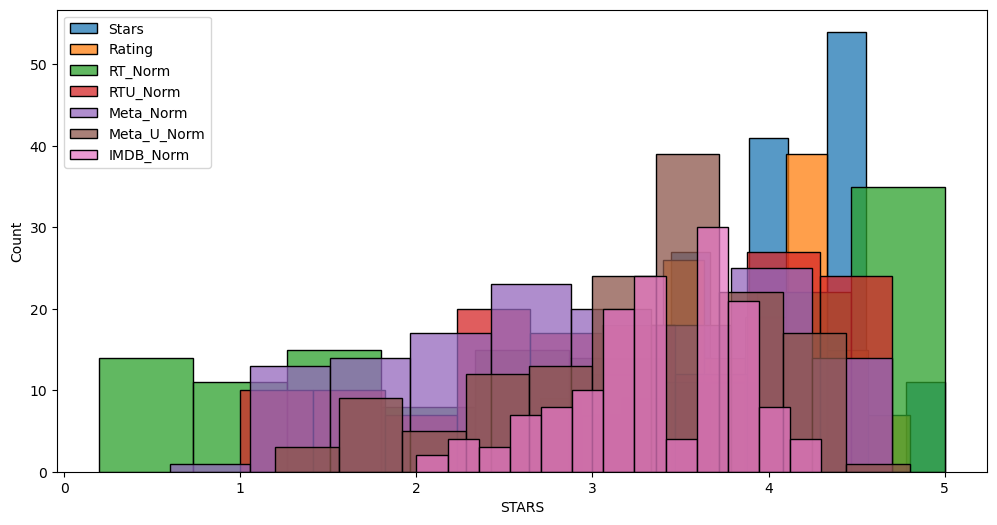

In [246]:
plt.figure(figsize=(12,6))
sns.histplot(data=dfnorm,x='STARS',label='Stars')
sns.histplot(data=df,x='RATING',label='Rating')
sns.histplot(data=df,x='RT_Norm',label='RT_Norm')
sns.histplot(data=df,x='RTU_Norm',label='RTU_Norm')
sns.histplot(data=df,x='Meta_Norm',label='Meta_Norm')
sns.histplot(data=df,x='Meta_U_Norm',label='Meta_U_Norm')
sns.histplot(data=df,x='IMDB_Norm',label='IMDB_Norm')

plt.legend(loc=(2))

<Axes: ylabel='Count'>

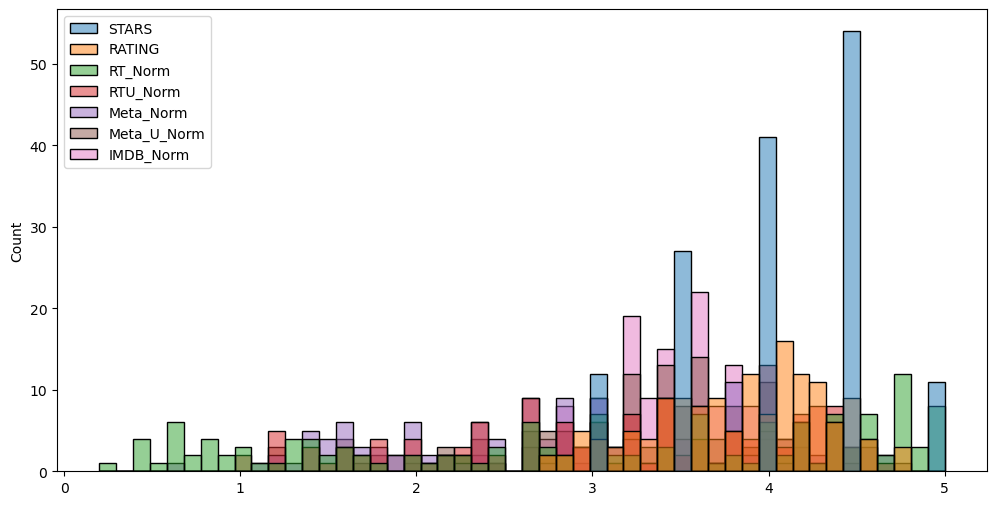

In [247]:
plt.figure(figsize=(12,6))
sns.histplot(dfnorm,bins=50)


### How are the worst movies rated across all platforms?

**TASK: Create a clustermap visualization of all normalized scores.**

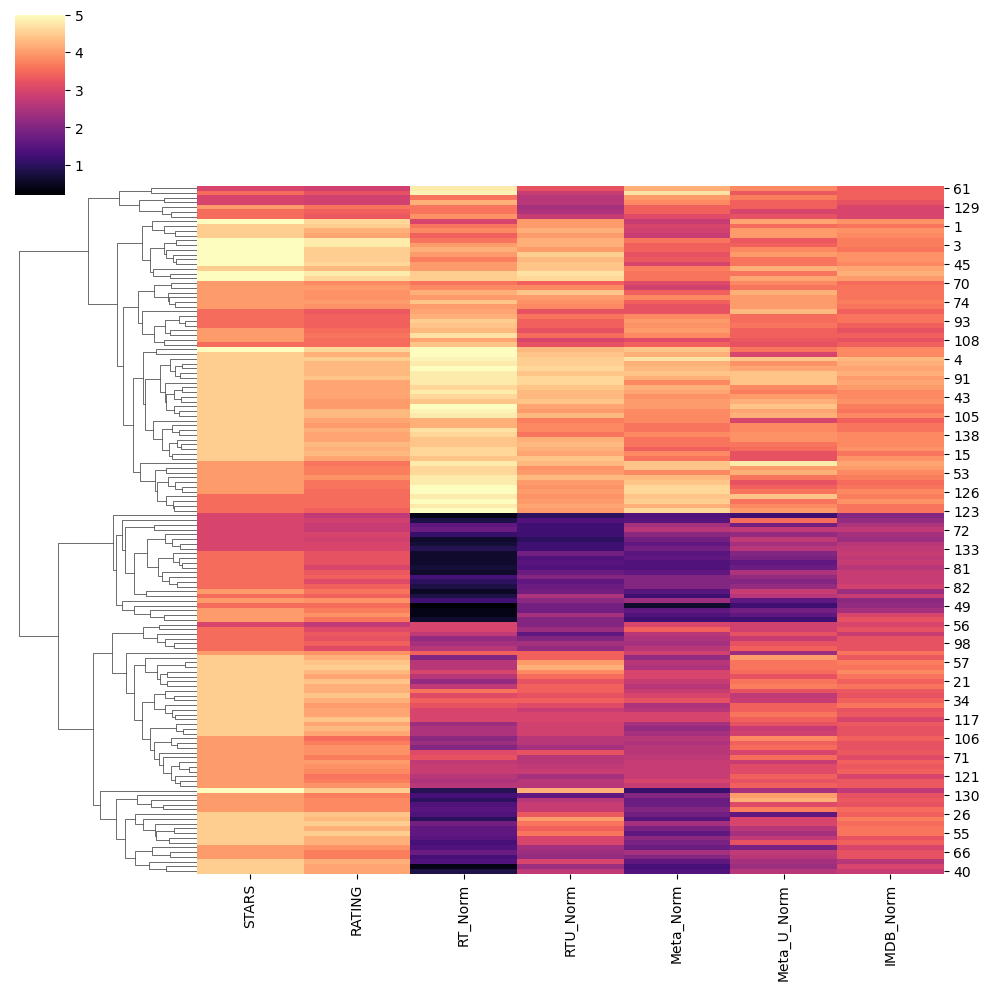

In [249]:
sns.clustermap(data=dfnorm,cmap='magma',col_cluster=False)

**TASK: Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies?** 

In [250]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [256]:
norm_films.sort_values('RT_Norm',ascending=True).head(10)

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
109,3.0,2.9,0.6,1.0,1.8,2.7,2.3,The Vatican Tapes (2015)
88,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)


 **Visualize the distribution of ratings across all sites for the top 10 worst movies.**

<Axes: ylabel='Density'>

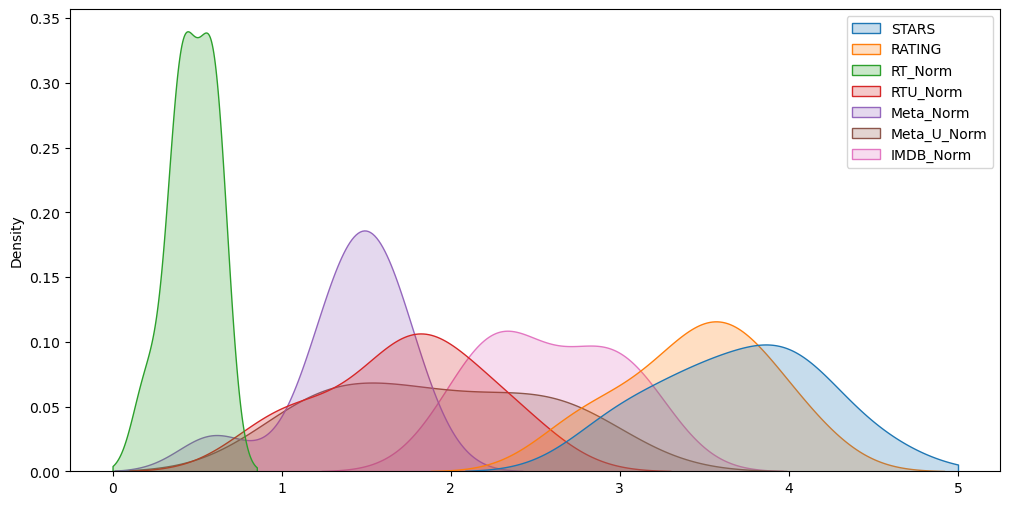

In [258]:
plt.figure(figsize=(12,6))
worst_movies=norm_films.sort_values('RT_Norm',ascending=True).head(10)
sns.kdeplot(data=worst_movies,fill=True,clip=[0,5])